In [1]:
import osdistance 

# Path to clusTCR repo goes here:
os.chdir('/path_to_repo/clusTCR/')

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# plot styling
plt.style.use(['seaborn-white', 'seaborn-paper'])
plt.rc('font', family='serif')
sns.set_palette('Set1')
sns.set_context('paper', font_scale=1.3)    # single-column figure

In [22]:
df = pd.read_csv('./results/clustcr_vs_greedy.tsv', sep='\t')

sizes = []
for i in range(1000,30001,100):
    size = [i] * 8
    sizes = sizes + size
    
df['s'] = sizes

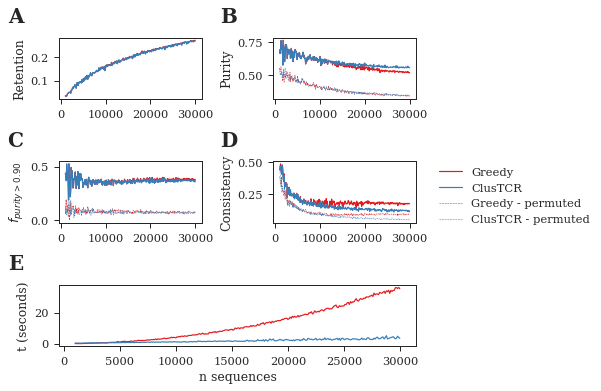

In [137]:
retent = df[df['metrics']=='retention']
purity = df[df['metrics']=='purity']
pur_90 = df[df['metrics']=='purity_90']
consist = df[df['metrics']=='consistency']

colors = sns.color_palette("Set1")

fig = plt.figure()

gs = fig.add_gridspec(3,2)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[2,:])

x = df.s.unique()
ax1.plot(x, retent[retent['method']=='Greedy'].actual, color=colors[0], label='Greedy')
ax1.plot(x, retent[retent['method']=='ClusTCR'].actual, color=colors[1], label='ClusTCR')
ax1.set_ylabel('Retention')

ax2.plot(x, purity[purity['method']=='Greedy'].actual, color=colors[0], label='Greedy')
ax2.plot(x, purity[purity['method']=='ClusTCR'].actual, color=colors[1], label='ClusTCR')
ax2.plot(x, purity[purity['method']=='Greedy'].baseline, color=colors[0], ls='--', lw=.5, label='Greedy - permuted')
ax2.plot(x, purity[purity['method']=='ClusTCR'].baseline, color=colors[1], ls='--', lw=.5, label='ClusTCR - permuted')
ax2.set_ylabel('Purity')

ax3.plot(x, pur_90[pur_90['method']=='Greedy'].actual, color=colors[0], label='Greedy')
ax3.plot(x, pur_90[pur_90['method']=='ClusTCR'].actual, color=colors[1], label='ClusTCR')
ax3.plot(x, pur_90[pur_90['method']=='Greedy'].baseline, color=colors[0], ls='--', lw=.5, label='Greedy - permuted')
ax3.plot(x, pur_90[pur_90['method']=='ClusTCR'].baseline, color=colors[1], ls='--', lw=.5, label='ClusTCR - permuted')
ax3.set_ylabel(r'$f_{purity > 0.90}$')

ax4.plot(x, consist[consist['method']=='Greedy'].actual, color=colors[0], label='Greedy')
ax4.plot(x, consist[consist['method']=='ClusTCR'].actual, color=colors[1], label='ClusTCR')
ax4.plot(x, consist[consist['method']=='Greedy'].baseline, color=colors[0], ls='--', lw=.5, label='Greedy - permuted')
ax4.plot(x, consist[consist['method']=='ClusTCR'].baseline, color=colors[1], ls='--', lw=.5, label='ClusTCR - permuted')
ax4.set_ylabel('Consistency')

ax5.plot(x, consist[consist['method']=='Greedy'].t, color=colors[0], label='Greedy')
ax5.plot(x, consist[consist['method']=='ClusTCR'].t, color=colors[1], label='ClusTCR')
ax5.set_ylabel('t (seconds)')
ax5.set_xlabel('n sequences')

fig.subplots_adjust(top=1.1, hspace=1, wspace=.5)

handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, labels, loc='center right',
          bbox_to_anchor=(1.30,0.6))

ax1.text(-0.25, 1.50, 'A', transform=ax1.transAxes,fontsize=20, fontweight='bold', va='top', ha='right')
ax2.text(-0.25, 1.50, 'B', transform=ax2.transAxes,fontsize=20, fontweight='bold', va='top', ha='right')
ax3.text(-0.25, 1.50, 'C', transform=ax3.transAxes,fontsize=20, fontweight='bold', va='top', ha='right')
ax4.text(-0.25, 1.50, 'D', transform=ax4.transAxes,fontsize=20, fontweight='bold', va='top', ha='right')
ax5.text(-0.1, 1.50, 'E', transform=ax5.transAxes,fontsize=20, fontweight='bold', va='top', ha='right')

# fig.tight_layout()
fig.savefig('./results/figures/clustcr_vs_greedy.eps', format='eps', bbox_inches='tight')